In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Churn_Modelling .csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data = pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

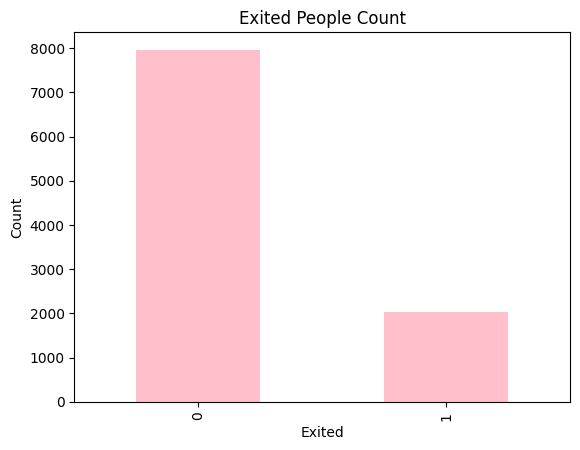

In [15]:
data['Exited'].value_counts().plot.bar(color = 'pink')
plt.title('Exited People Count')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [16]:
X = data.drop('Exited', axis = 1)
Y = data['Exited']

In [17]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
!pip install imbalanced-learn
!pip show imbalanced-learn



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\Inderpal Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [19]:
import sys
print(sys.executable)


C:\Users\Inderpal Singh\Desktop\TFPROJECT\my_venv\Scripts\python.exe


In [34]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])


0

In [35]:
from imblearn.over_sampling import SMOTE


In [36]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [38]:
Y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.20, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [41]:
X_train

array([[-1.47797919,  1.40003227, -0.28665685, ...,  1.32259015,
        -0.62880822, -1.23037074],
       [ 1.09153951,  0.09779735, -1.39187473, ..., -0.75609213,
        -0.62880822,  0.81276315],
       [-0.71259064, -1.00409373,  0.08174911, ..., -0.75609213,
         1.59030999, -1.23037074],
       ...,
       [ 0.19494149,  0.19796927,  1.18696699, ..., -0.75609213,
        -0.62880822,  0.81276315],
       [-1.60918865,  2.10123568, -0.28665685, ..., -0.75609213,
         1.59030999,  0.81276315],
       [ 0.52296516,  0.9993446 , -1.39187473, ...,  1.32259015,
        -0.62880822,  0.81276315]])

In [42]:
log = LogisticRegression()

In [43]:
log.fit(X_train, Y_train)

LogisticRegression()

In [44]:
y_pred1 = log.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_test, y_pred1)

0.7777777777777778

In [47]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [48]:
precision_score(Y_test,y_pred1)

0.768595041322314

In [49]:
recall_score(Y_test,y_pred1)

0.7784932388924662

In [50]:
f1_score(Y_test,y_pred1)

0.7735124760076776

In [52]:
from sklearn import svm

In [53]:
svm = svm.SVC()

In [54]:
svm.fit(X_train,Y_train)

SVC()

In [55]:
y_pred2 = svm.predict(X_test)

In [57]:
accuracy_score(Y_test,y_pred2)

0.8531073446327684

In [58]:
precision_score(Y_test,y_pred2)

0.854807063440157

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [62]:
y_pred3 = knn.predict(X_test)

In [63]:
accuracy_score(Y_test,y_pred3)

0.8214061519146265

In [64]:
precision_score(Y_test,y_pred3)

0.8082706766917294

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [68]:
y_pred4 = dt.predict(X_test)

In [69]:
accuracy_score(Y_test,y_pred4)

0.8072818581293157

In [70]:
precision_score(Y_test,y_pred4)

0.786805131337813

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()

In [74]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [75]:
y_pred5 = rf.predict(X_test)

In [76]:
accuracy_score(Y_test,y_pred5)

0.8725674827369743

In [77]:
precision_score(Y_test,y_pred5)

0.8669225847728727

In [89]:
final_data = pd.DataFrame({'Models':['LR', 'SVC', 'KNN', 'DT', 'RF'],
                           'ACC' :[accuracy_score(Y_test,y_pred1),
                                   accuracy_score(Y_test,y_pred2),
                                   accuracy_score(Y_test,y_pred3),
                                   accuracy_score(Y_test,y_pred4),
                                   accuracy_score(Y_test,y_pred5)]})

In [90]:
final_data

,Models,ACC
0,LR,0.777778
1,SVC,0.853107
2,KNN,0.821406
3,DT,0.807282
4,RF,0.872567


In [159]:
import matplotlib.pyplot as plt
import numpy as np


In [160]:
categories = ['LR', 'SVC', 'KNN', 'DT', 'RF']
values = [accuracy_score(Y_test,y_pred1),
           accuracy_score(Y_test,y_pred2),
           accuracy_score(Y_test,y_pred3),
           accuracy_score(Y_test,y_pred4),
           accuracy_score(Y_test,y_pred5)]


<BarContainer object of 5 artists>

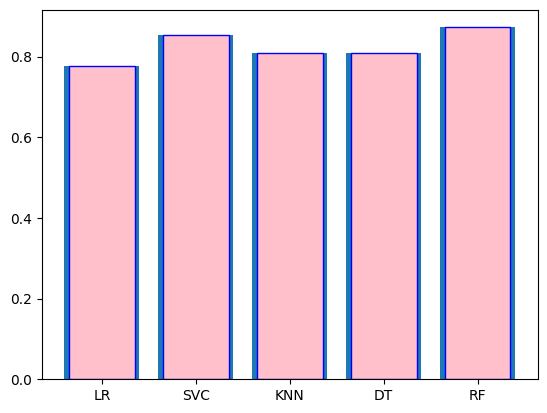

In [161]:
plt.bar(categories, values)
plt.bar(categories, values, color='PINK', edgecolor='blue', width=0.7)

In [94]:
categories = ['LR', 'SVC', 'KNN', 'DT', 'RF']
values = [precision_score(Y_test,y_pred1),
           precision_score(Y_test,y_pred2),
           precision_score(Y_test,y_pred3),
           precision_score(Y_test,y_pred4),
           precision_score(Y_test,y_pred5)]


<BarContainer object of 5 artists>

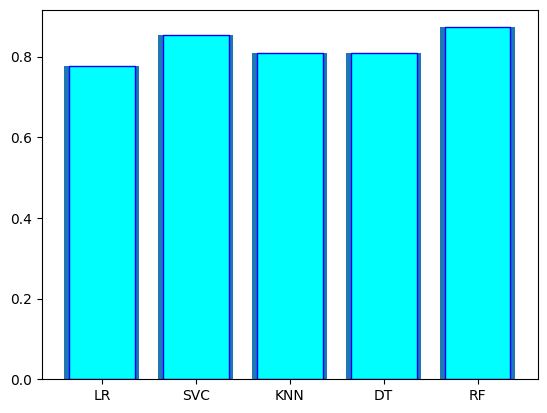

In [162]:
plt.bar(categories, values)
plt.bar(categories, values, color='cyan', edgecolor='blue', width=0.7)

In [96]:
X_res = sc.fit_transform(X_res)

In [97]:
rf.fit(X_res, Y_res)

RandomForestClassifier()

In [98]:
import joblib

In [100]:
joblib.dump(rf, 'churn_prediction_model')

['churn_prediction_model']

In [101]:
model = joblib.load('churn_prediction_model')

In [102]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [104]:
model.predict([[35,22,2,899,0,0,0,5660,1,0,0]])

array([0], dtype=int64)